# Support Vector Classification(SVC)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,
    n_features=2,n_classes=2,
    n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[-2.49105912, -1.5303118 ],
       [ 1.72306172, -0.82096114],
       [-0.97304195,  1.80775628],
       ...,
       [-0.61988441, -0.42961731],
       [ 1.83345255, -1.38650305],
       [ 1.72844797, -0.32899568]])

In [5]:
type(X)

numpy.ndarray

In [6]:
pd.DataFrame(X)[0]

0     -2.491059
1      1.723062
2     -0.973042
3     -0.945260
4     -0.492698
         ...   
995   -0.938811
996   -1.890254
997   -0.619884
998    1.833453
999    1.728448
Name: 0, Length: 1000, dtype: float64

In [7]:
pd.DataFrame(X)

,0,1
0,-2.491059,-1.530312
1,1.723062,-0.820961
2,-0.973042,1.807756
3,-0.945260,1.413161
4,-0.492698,-0.719085
...,...,...
995,-0.938811,0.967310
996,-1.890254,-0.794781
997,-0.619884,-0.429617
998,1.833453,-1.386503


<Axes: xlabel='0', ylabel='1'>

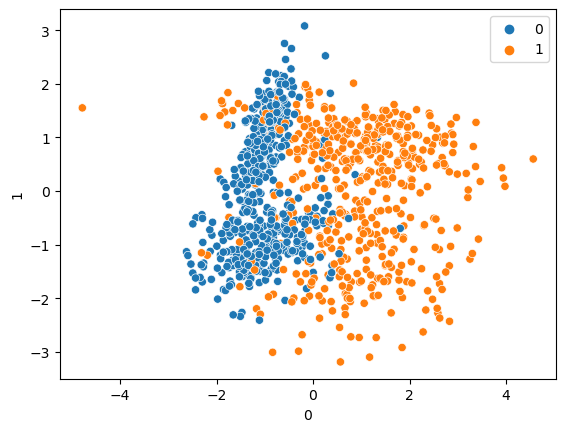

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.svm import SVC

In [14]:
svc=SVC(kernel='linear')

In [15]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
svc.coef_

array([[ 1.54605332, -0.01801617]])

In [17]:
y_pred=svc.predict(X_test)

In [18]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1])

In [19]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [21]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       130
           1       0.86      0.89      0.88       120

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[113  17]
 [ 13 107]]
0.88


# HyperParameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# define parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001]}

In [26]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.880 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.853 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.860 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.873 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.827 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [29]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [30]:
y_predg=grid.predict(X_test)

In [31]:
y_predg

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1])

In [32]:
print(classification_report(y_test,y_predg))
print(confusion_matrix(y_test,y_predg))
print(accuracy_score(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.92      0.93      0.93       120

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[120  10]
 [  8 112]]
0.928
